<a href="https://colab.research.google.com/github/jlb719ru/gisclass/blob/main/ps4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###"Exploring the Interplay of Racial Demographics, Poverty, and Crime Rates: A County-Level Analysis in New Jersey with a Focus on the African-American Population"


**Plan**:
The foundation of my research is rooted in an examination of criminal data and statistics, with a specific emphasis on the intersection of racial demographics, poverty rates, and crime rates. Studying criminal behavior plays a vital role in enhancing societal comprehension, management, and mitigation of crime. It also facilitates the identification and analysis of its root causes, offering valuable insights for the development of effective crime reduction strategies and initiatives.

The primary focus in this case is the African-American population and poverty. A correlation was identified among these variables at a nationwide level. As the study procedes, this research will refine its focus to the state level and then municipality level, specifically within the state of New Jersey and Camden County, NJ. The analysis will utilize datasets obtained at both the county and municipality level for a more localized examination. Through the subsequent maps and visualizations, I aim to explore the potential correlation between poverty, wages, and crime rates within the African American community of New Jersey.

**Resources**:
The data incorporated in this study were drawn from:
- New Jersey State Police Uniform Crime Report
- United States Census
- Index Mundi
- New Jersey Municipal-County Offense & Demographic Data
-Wikipedia

U.S. Shapefile: https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

NJ Shapefile: https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

Camden County Geojson File: https://camdencountynj-ccdpw.opendata.arcgis.com/datasets/CCDPW::camden-county-boundary/explore?location=39.802101%2C-74.936747%2C11.23

### Crime & Poverty At A Nationwide Perspective

In [80]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

!pip install mapclassify
import mapclassify #need for thematic map classification

In [81]:
df2 = pd.read_csv("https://github.com/jlb719ru/gisclass/raw/main/state_crime.csv")
Larc2019 = df2[df2.Year==2019]
Larc2019 = Larc2019.drop("Year",axis=1)
Larc2019 = Larc2019.drop("Data.Population",axis=1)
Larc2019 = Larc2019.drop("Data.Rates.Property.All",axis=1)
Larc2019 = Larc2019.drop("Data.Rates.Property.Burglary",axis=1)
Larc2019 = Larc2019.drop("Data.Rates.Property.Motor",axis=1)
Larc2019 = Larc2019.drop("Data.Rates.Violent.All",axis=1)
Larc2019 = Larc2019.drop("Data.Rates.Violent.Assault",axis=1)
Larc2019 = Larc2019.drop("Data.Rates.Violent.Rape",axis=1)
Larc2019 = Larc2019.drop("Data.Rates.Violent.Robbery",axis=1)
Larc2019 = Larc2019.drop("Data.Rates.Violent.Murder",axis=1)
Larc2019 = Larc2019.drop("Data.Totals.Property.All",axis=1)
Larc2019 = Larc2019.drop("Data.Totals.Property.Burglary",axis=1)
Larc2019 = Larc2019.drop("Data.Totals.Property.Larceny",axis=1)
Larc2019 = Larc2019.drop("Data.Totals.Property.Motor",axis=1)
Larc2019 = Larc2019.drop("Data.Totals.Violent.All",axis=1)
Larc2019 = Larc2019.drop("Data.Totals.Violent.Murder",axis=1)
Larc2019 = Larc2019.drop("Data.Totals.Violent.Assault",axis=1)
Larc2019 = Larc2019.drop("Data.Totals.Violent.Rape",axis=1)
Larc2019 = Larc2019.drop("Data.Totals.Violent.Robbery",axis=1)
#Larc2019

In [82]:
! wget -q -O usmap.zip "https://github.com/jlb719ru/gisclass/raw/main/cb_2018_us_state_500k%20(1).zip"
zip_ref = zipfile.ZipFile('usmap.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

In [83]:
usmap=gpd.read_file('cb_2018_us_state_500k.shp')
#usmap.plot()

In [84]:
map = pd.merge( usmap,Larc2019, left_on='NAME', right_on='State', indicator=True)
#map[['NAME','State','_merge']] #aok: always investigate merge results!!

In [85]:
map = map.dropna()
map = map[~map['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

In [86]:
poverty = pd.read_csv("https://github.com/jlb719ru/gisclass/raw/main/poverty_by_state.csv")
poverty.rename(columns={'Rate': 'Poverty.Rate'}, inplace=True)
#poverty

In [87]:
map2 = pd.merge(Larc2019, poverty)
#map2

In [88]:
geomap = pd.merge(usmap, map2, left_on='NAME', right_on='State')
geomap = geomap.dropna()
geomap = geomap[~geomap['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

In [89]:
newmap = geomap.copy()

newmap["geometry"] = newmap["geometry"].centroid

<ipython-input-89-2e1d6d6fcb8d>:3: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




<Axes: >

<Axes: >

[]

[]

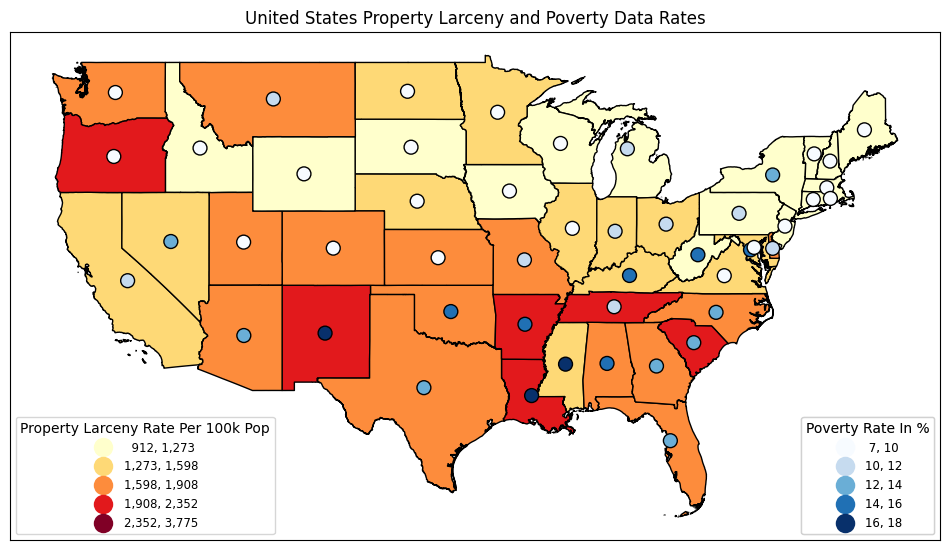

In [90]:
fig, ax = plt.subplots(1, figsize=(12,16))
geomap.plot(ax=ax,column='Data.Rates.Property.Larceny',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Property Larceny Rate Per 100k Pop''')

newmap.plot(ax=ax,column='Poverty.Rate',legend=True,cmap='Blues',scheme='natural_breaks',k=5,      #centroids are in newmap
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 100) #

ax.title.set_text("United States Property Larceny and Poverty Data Rates")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''Poverty Rate In %''')



ax.add_artist(l2)
ax.add_artist(l1)

Observation: This map also ties in poverty rates with property larceny rates. In most states with higher larceny rates, poverty rates are also on the higher end of the spectrum. However, via this data, it is evident that states with lower poverty rates also have fewer property larceny rates. This map can also indicate that poverty rates have some sort of influence or relation on property larceny rates.

### Racial Distribution of the U.S.



As my study progresses, particular emphasis will be placed on the examination of the black community. According to data released by the United States Census, the official poverty rate among the black population reached a historically low level in 2022, significantly decreasing from pre-pandemic levels.

(External research source: Poverty Rate for the Black Population Fell Below Pre-Pandemic Levels https://www.census.gov/library/stories/2023/09/black-poverty-rate.html)

In [91]:
df3 = pd.read_excel("https://github.com/jlb719ru/gisclass/raw/main/racedata.xlsx")
race_data = df3

indices_to_remove = [0, 1, 2, 3, 4, 56, 57, 58, 59, 60, 61, 62, 63]
race_data = race_data.drop(indices_to_remove)

In [92]:
race = race_data[['State','%.1', '%.2', '%.3', '%.4', '%.5', '%.6', '%.7' ]]
race.rename(columns={'%.1': 'African-American Pop%', '%.2':'Native American Pop%', '%.3':'Asian %Pop', '%.4':'Pac. Islander Pop%', '%.5':'Other Pop%', '%.6':'Mixed Race Pop%', '%.7':'Hispanic/Latino Pop%'}, inplace=True)

<ipython-input-92-b1f31ed95773>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
race['State']=race['State'].str.strip()
map2['State']=map2['State'].str.strip()

<ipython-input-93-d06d3f926c7f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
afr_am = race_data[['State','%.1']]
afr_am.rename(columns={'%.1': 'African-American Pop%'}, inplace=True)

<ipython-input-94-44fed33dc768>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### The Distribution of Minority Racial Populations Across the U.S.

Examining the nationwide landscape, the intricate patterns of minority racial populations present a compelling narrative. The data reveals a dynamic and varied racial composition across the United States, showcasing the diversity inherent in the nation's demographic fabric.

In [95]:
import seaborn as sns

In [96]:
sorted_race = race.reindex(sorted(race.columns), axis=1)
styled_df = sorted_race.style.background_gradient(cmap='YlOrRd')
styled_df

,African-American Pop%,Asian %Pop,Hispanic/Latino Pop%,Mixed Race Pop%,Native American Pop%,Other Pop%,Pac. Islander Pop%,State
5,0.256400,0.015100,0.052600,0.036700,0.004600,0.002900,0.000500,Alabama
6,0.028300,0.059200,0.067900,0.097800,0.148400,0.006200,0.017000,Alaska
7,0.044300,0.034800,0.306500,0.037300,0.036900,0.004400,0.002000,Arizona
8,0.149400,0.017000,0.085300,0.048900,0.006800,0.002700,0.004700,Arkansas
9,0.053600,0.151200,0.394000,0.041200,0.003900,0.005700,0.003500,California
10,0.038300,0.033800,0.218800,0.045200,0.005800,0.005100,0.001600,Colorado
11,0.100100,0.047300,0.172900,0.038200,0.001800,0.007500,0.000300,Connecticut
12,0.215100,0.042800,0.105300,0.043500,0.002500,0.004600,0.000300,Delaware
13,0.409100,0.048100,0.112600,0.042800,0.001900,0.005400,0.000500,District of Columbia
14,0.145200,0.029200,0.264500,0.036800,0.002000,0.006400,0.000500,Florida


### Distribution of the African-American Population Across the U.S.

In [97]:
sorted_afr = afr_am.sort_values(by='African-American Pop%', ascending=False)[:51]
styled_df_afr = sorted_afr.style.background_gradient(cmap='YlOrRd')

styled_df_afr

,State,African-American Pop%
13,District of Columbia,0.409100
29,Mississippi,0.364400
23,Louisiana,0.311800
15,Georgia,0.306000
25,Maryland,0.290600
5,Alabama,0.256400
45,South Carolina,0.247900
12,Delaware,0.215100
38,North Carolina,0.201900
51,Virginia,0.182800


Observation: The above heat map is specifically focused on the African-Americcan population percentage. The top five areas with the highest African-American population percentages are the District of Columbia, Mississippi, Louisiana, Georgia, and Maryland. It has been found through this data that states with a higher African-American population percentage are also those consisting of higher poverty and crime rates.

In [98]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC=gpd.read_file('nj_counties.shp')

In [99]:
#Overall race distribution data of NJ by county
overall_race = pd.read_excel("https://github.com/jlb719ru/gisclass/raw/main/njoverallraces.xlsx")

### Distribution of Races In the State of New Jersey:

<Figure size 800x800 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Races in NJ')

([<matplotlib.patches.Wedge at 0x7a2d8a9f89d0>,
 [Text(0.9979554325018838, -0.4626931539800199, 'White '),
  Text(-1.2679262041698403, -0.2869897921171777, 'Black'),
  Text(-1.0482877154427124, 0.3333059640208966, 'Am.Ind.&Al'),
  Text(-0.8304967288785353, 0.7213010351594213, 'Asian'),
  Text(-0.520162626735042, 0.969242406082246, 'Nat.Haw.&Pac.'),
  Text(-0.26480302695025204, 1.067651327408899, 'Other ')],
 [Text(0.5443393268192093, -0.2523780839891017, '63.8%'),
  Text(-0.7802622794891323, -0.1766091028413401, '15.3%'),
  Text(-0.5717932993323884, 0.1818032531023072, '1.6%'),
  Text(-0.4529982157519283, 0.39343692826877524, '11.4%'),
  Text(-0.2837250691282047, 0.5286776760448614, '0.2%'),
  Text(-0.14443801470013748, 0.5823552694957631, '7.7%')])

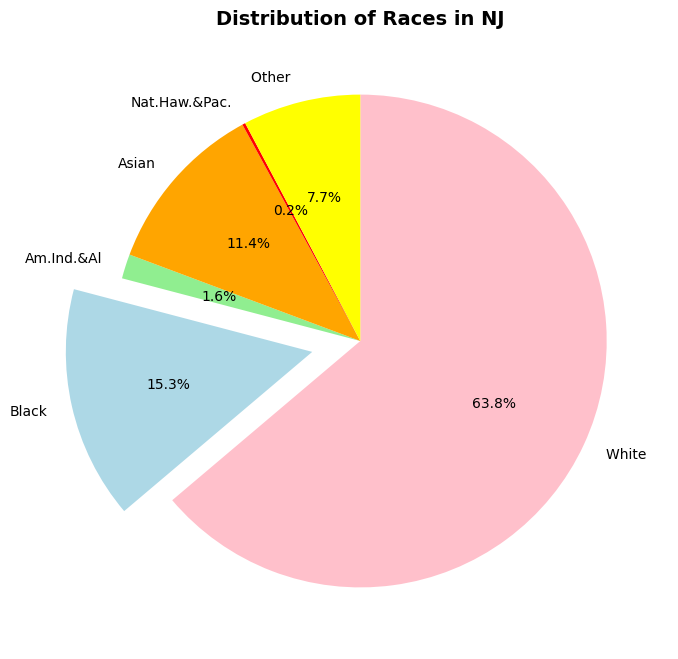

In [100]:
races = overall_race['Race']
percentages = overall_race['Percentage']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.title('Distribution of Races in NJ', size=14, weight='bold')

# Adjust the colors as needed
colors = ['pink', 'lightblue', 'lightgreen', 'orange', 'red', 'yellow']
exp = [0,0.2,0,0,0,0]

plt.pie(percentages, labels=races, autopct='%.1f%%', explode=exp, colors=colors, startangle=90, counterclock=False)
plt.show()

Observation: The information depicted in the pie chart presented above has been sourced from the United States Census. The visual representation illustrates a substantial demographic composition in New Jersey, with a predominant representation of the white race, followed by the black population and several other minority ethnicities.

In [101]:
larceny = pd.read_excel("https://github.com/jlb719ru/gisclass/raw/main/njccountylarceny.xlsx")
race = pd.read_excel("https://github.com/jlb719ru/gisclass/raw/main/njracedata.xlsx")
poverty = pd.read_excel("https://github.com/jlb719ru/gisclass/raw/main/njpovertycounty.xlsx")

In [102]:
njcrime = larceny.merge(race, on='County').merge(poverty, on='County')
njcrime['County'] = njcrime['County'].str.upper()
#njcrime

In [103]:
#Overall data merge
njmap = pd.merge(njC,njcrime, left_on='COUNTY', right_on='County', indicator=True,how='outer')
njmap.rename(columns={'Race %': 'Afr.Am. Pop %'}, inplace=True)
#njmap

### A Comparison: Larceny & African-American Population

The following map will compare crime rates with the percentage of the African-American population. In this illustration, specific attention is directed towards the incidence of larceny. Larceny is defined as a form of theft that involves the unlawful taking of tangible property, including items such as automobiles, jewelry, computers, etc.

<Axes: >

<Axes: >

Text(0.5, 1.0, 'NJ Larceny Rate by County per 100k')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'NJ African-American Race % by County')

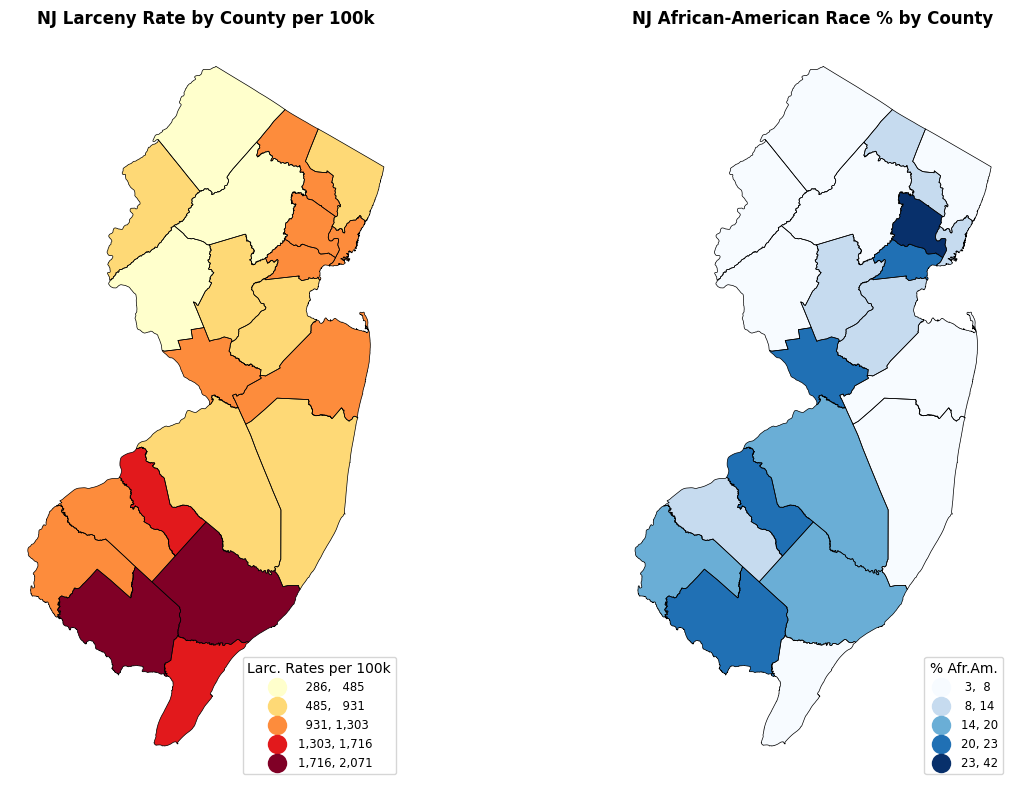

In [104]:
# Create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Larceny Map
njmap.boundary.plot(ax=ax1, edgecolor='black', linewidth=0.5)
njmap.plot(ax=ax1, column='Larceny Rate per 100k', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                       'fontsize': 'small', 'markerscale': 1.4, 'title': 'Larc. Rates per 100k'})

ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax1.spines[edge].set_visible(False)

ax1.set_title('NJ Larceny Rate by County per 100k', size=12, weight='bold')

# Race Map
njmap.boundary.plot(ax=ax2, edgecolor='black', linewidth=0.5)
njmap.plot(ax=ax2, column='Afr.Am. Pop %', legend=True, cmap='Blues', scheme='natural_breaks', k=5,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                       'fontsize': 'small', 'markerscale': 1.4, 'title': '% Afr.Am.'})

ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax2.spines[edge].set_visible(False)

ax2.set_title('NJ African-American Race % by County', size=12, weight='bold')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


Observation: According to the mapped data, a discernible correlation exists between larceny crime rates and the African-American community. A recurrent pattern observed in the visualization is the prevalence of higher larceny crime rates in counties characterized by a larger African-American population.

Southern counties in New Jersey exhibit the highest crime rates, concurrently housing the majority of the African-American population. An interesting observation is Essex County, a northern county which possesses the highest African-American percentage among NJ counties. Despite this, Essex County experiences comparatively lower larceny crime rates than the other southern counties that also have higher African-American population percentages. While the incidence of crime is diminished, it still aligns with the higher end of the overall crime rate spectrum.

In [105]:
#Importing to make heatmap
import seaborn as sns

In [106]:
#Poverty by County data for heat map
pov_per = njmap[['COUNTY','Poverty %']]

In [107]:
#Adding centroids
newmap = njmap.copy()

newmap["geometry"] = newmap["geometry"].centroid

### Poverty: By County & In Relation To the African-American Population

The following illustrates poverty from two distinct viewpoints: poverty at the county level and its correlation with the African-American population. As stated by the U.S. Department of Justice Office of Justice Programs, poverty serves as a contributing factor to theft, alongside poor education, low income, and unemployment. The visualizations below aim to convey any potential influence that poverty may exert.

(External research source: Social and Economic Aspects of Theft https://www.ojp.gov/ncjrs/virtual-library/abstracts/social-and-economic-aspects-theft#:~:text=Poor%20education%20appears%20to%20be,greater%20among%20the%20property%20offenders)

In [108]:
#Poverty heat map
pov_per = pov_per.sort_values(by='Poverty %', ascending=False)[:51]
styled_pov = pov_per.style.background_gradient(cmap='YlOrRd')
styled_pov


,COUNTY,Poverty %
5,CUMBERLAND,15.200000
6,ESSEX,14.900000
8,HUDSON,14.300000
13,PASSAIC,13.600000
3,CAMDEN,12.900000
0,ATLANTIC,12.800000
14,SALEM,11.200000
10,MERCER,10.900000
4,CAPE MAY,10.300000
12,OCEAN,9.700000


Observation: According to the U.S. Department of Agriculture, high poverty is defined as exceeding 20%. Fortunately, none of New Jersey's counties have reached that threshold. Nonetheless, some counties are steadily approaching it. The top five counties with the highest poverty rates are Cumberland County, Essex County, Hudson County, Passaic County, and Camden County, ranging from 12.9% to 15.2%.

<Axes: >

<Axes: >

[]

[]

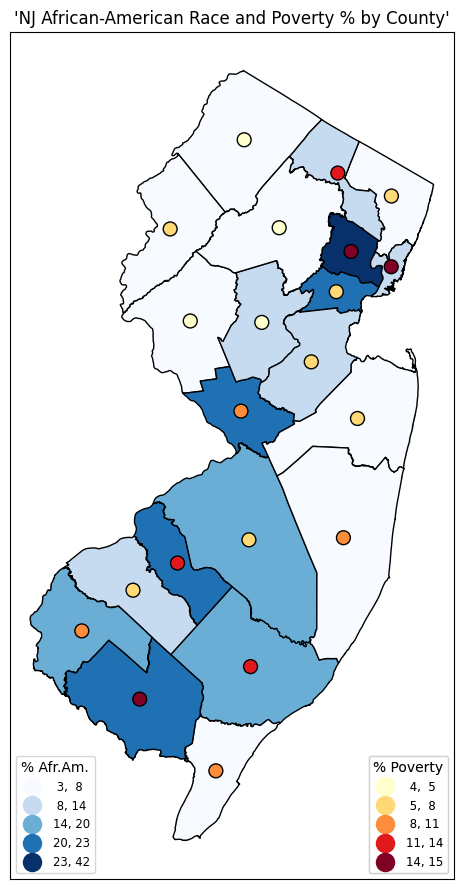

In [109]:
#NJ map w/ centroids
fig, ax = plt.subplots(1, figsize=(15,11))
njmap.plot(ax=ax,column='Afr.Am. Pop %',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''% Afr.Am.''')

newmap.plot(ax=ax,column='Poverty %',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,      #centroids are in newmap
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 100) #

ax.title.set_text("'NJ African-American Race and Poverty % by County'")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''% Poverty''')



ax.add_artist(l2)
ax.add_artist(l1)

Observation: As depicted in the map, a clear relationship exists between counties with a dense African-American population and those experiencing higher levels of poverty. The top five counties with the highest African-American population percentages are Essex County, Union County, Camden County, Cumberland County, and Mercer County, ranging from 21.6% to 42.2%. Based on the data, three counties emerge in both the top five for the highest poverty percentage and the top five for the highest African-American population percentage: Cumberland County, Essex County, and Camden County. Notably, Essex County not only has the highest African-American population percentage, but also ranks second in terms of the highest poverty rate among the counties.

In [110]:
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted
import numpy as np

### Final Observations: The Overall Comparison of NJ Counties

In [111]:
#Scatterplot
px.scatter(njmap, title='The Overall Comparison of Crime Rates, Poverty, and Race in NJ Counties', x="Larceny Rate per 100k", y="Poverty %", color="Afr.Am. Pop %",
                  hover_data=['COUNTY'],width=1000,height=600)


Observation: The presented scatterplot effectively brings together the data to illustrate the comprehensive relationship and comparison between racial demographics, poverty, and larceny crime rates. Examining the scatterplot as a whole, it becomes evident that an increase in poverty percentage corresponds to a rise in the larceny rate. Furthermore, there appears to be a correlation with the African-American population percentage. Regions with higher poverty percentages and larceny crime rates exhibit a greater proportion of African-American population. Conversely, areas characterized by lower poverty percentages and larceny crime rates also demonstrate lower African-American population percentages.

### With A Closer Look At Camden County, NJ...


As a university student in Camden County, I found it intriguing to explore the crime rates within our community, especially considering our significant African-American population. This dataset specifically highlights the overall crime rate per 1,000 residents. The map below visually represents Camden County, adorned with markers pinpointing each municipality within its bounds.

In [112]:
import folium
import pandas as pd

# URL for the GeoJSON file
geojson_url = "https://github.com/jlb719ru/gisclass/raw/main/Camden_County_Boundary.geojson"

# Read data from Excel file
data = pd.read_excel("https://github.com/jlb719ru/gisclass/raw/main/CamMunCrR.xlsx")

# County center (adjust coordinates based on your county)
county_center = [39.926813, -75.024631]

# Initialize Folium map
m = folium.Map(location=county_center, zoom_start=10)

# Create a color legend
color_legend = {
    'Crime Rate < 25.388': 'green',
    '25.388 < Crime Rate < 36.84': 'orange',
    '36.84 < Crime Rate < 90.1': 'red',
    'NaN': 'cadetblue'  # Assign 'cadetblue' for NaN values
}

# Add GeoJson Layer
folium.GeoJson(
    geojson_url,
    name='geojson',
    style_function=lambda feature: {
        'fillColor': 'blue',  # Light blue with 50% opacity
        'color': 'blue',      # Set the boundary color
        'weight': 2           # Set the boundary weight
    }
).add_to(m)

# Add markers to the map with different colors and legend labels
for index, row in data.iterrows():
    location = [row['Latitude'], row['Longitude']]
    popup_content = f"<b>Municipality:</b> {row['Municipality']}<br>" \
                    f"<b>Crime Rate:</b> {row['CrimeRate']}"

    # Determine the color based on crime rate, including handling NaN
    if pd.isna(row['CrimeRate']):
        marker_color = color_legend['NaN']
    elif row['CrimeRate'] < 25:
        marker_color = color_legend['Crime Rate < 25.388']
    elif row['CrimeRate'] < 75:
        marker_color = color_legend['25.388 < Crime Rate < 36.84']
    else:
        marker_color = color_legend['36.84 < Crime Rate < 90.1']

    # Create a marker with a custom color
    folium.Marker(
        location=location,
        icon=folium.Icon(color=marker_color),
        popup=folium.Popup(popup_content, max_width=300)
    ).add_to(m)

# Add a legend to the map
legend_html = """
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 150px; height: 140px;
                 border:2px solid grey; z-index:9999; font-size:12px;
                 background-color:white; opacity:0.85">
     &nbsp; Crime Rate per 1k <br>
     &nbsp; <i style="background: green">&nbsp;&nbsp;&nbsp;</i> Low Crime <br>
     &nbsp; <i style="background: orange">&nbsp;&nbsp;&nbsp;</i> Medium Crime <br>
     &nbsp; <i style="background: red">&nbsp;&nbsp;&nbsp;</i> High Crime <br>
     &nbsp; <i style="background: cadetblue">&nbsp;&nbsp;&nbsp;</i> Not Available <br>
     </div>
     """

m.get_root().html.add_child(folium.Element(legend_html))

# Add layer control to show/hide layers
folium.LayerControl().add_to(m)

# Save or display the map
m.save('combined_map_with_legend.html')
m

Observation: The markers exhibit a meticulous color coordination corresponding to varying levels of crime rates: low, medium, and high. These categorizations were established based on distinct percentiles. Specifically, low crime rates fall within the 0-33rd percentile, medium crime rates occupy the 34th-66th percentile, and high crime rates are represented by the 67th-100th percentile. Notably, crime rate data for Tavistock Boro and Pine Valley Boro is unavailable, denoted by the distinctive blue markers.

Upon analysis of the available data, it becomes evident that Brooklawn Boro and Camden City stand out as municipalities with the highest crime rates.

### Prospective Areas of Study and Interest

Embarking on a deeper exploration of the intricate connections between crime rates, poverty, race, and other influential factors presents an opportunity for both intellectual curiosity and practical problem-solving. This endeavor holds the potential to unearth valuable insights, not only at a national scale but also on the granular level of individual municipalities, offering tailored solutions for communities.

A more thorough investigation into these dynamics allows us to gain a nuanced understanding of the specific challenges faced by different regions. For instance, a focused inquiry into social capital, education, healthcare, wages, recreational activities, childcare, and other relevant factors may reveal compelling patterns, providing a foundation for targeted interventions and improvements.